In [1]:
# Importing the usual libraries

import pandas as pd
import numpy as np

import statsmodels.formula.api as sm

from matplotlib import pyplot as plt
%matplotlib inline

import seaborn as sns

In [9]:
# Import data file

df = pd.read_excel("IBM Employee Attrition.xlsx")

# Display all columns
pd.set_option('display.max_columns', None)

df.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,Sales,1,2,Life Sciences,1,2,Female,3,2,Sales Executive,4,Single,5993,8,Y,Yes,11,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,Research & Development,8,1,Life Sciences,2,3,Male,2,2,Research Scientist,2,Married,5130,1,Y,No,23,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,Research & Development,2,2,Other,4,4,Male,2,1,Laboratory Technician,3,Single,2090,6,Y,Yes,15,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,Research & Development,3,4,Life Sciences,5,4,Female,3,1,Research Scientist,3,Married,2909,1,Y,Yes,11,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,Research & Development,2,1,Medical,7,1,Male,3,1,Laboratory Technician,2,Married,3468,9,Y,No,12,3,4,1,6,3,3,2,2,2,2


In [10]:
# Check to see what type of data, how much data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   Department                1470 non-null   object
 4   DistanceFromHome          1470 non-null   int64 
 5   Education                 1470 non-null   int64 
 6   EducationField            1470 non-null   object
 7   EmployeeNumber            1470 non-null   int64 
 8   EnvironmentSatisfaction   1470 non-null   int64 
 9   Gender                    1470 non-null   object
 10  JobInvolvement            1470 non-null   int64 
 11  JobLevel                  1470 non-null   int64 
 12  JobRole                   1470 non-null   object
 13  JobSatisfaction           1470 non-null   int64 
 14  MaritalStatus           

In [11]:
# Look for duplicate rows

df.loc[df.duplicated()]

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager


In [12]:
# Find descriptive statistics, see if any fake info

df.describe()

# All looks good: categorical variables have appropriate min and max values, according to the scale given

,Age,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,9.192517,2.912925,1024.865306,2.721769,2.729932,2.063946,2.728571,6502.931293,2.693197,15.209524,3.153741,2.712245,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,8.106864,1.024165,602.024335,1.093082,0.711561,1.106940,1.102846,4707.956783,2.498009,3.659938,0.360824,1.081209,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1009.000000,0.000000,11.000000,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,2.000000,2.000000,491.250000,2.000000,2.000000,1.000000,2.000000,2911.000000,1.000000,12.000000,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,7.000000,3.000000,1020.500000,3.000000,3.000000,2.000000,3.000000,4919.000000,2.000000,14.000000,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,14.000000,4.000000,1555.750000,4.000000,3.000000,3.000000,4.000000,8379.000000,4.000000,18.000000,3.000000,4.000000,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,29.000000,5.000000,2068.000000,4.000000,4.000000,5.000000,4.000000,19999.000000,9.000000,25.000000,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


<AxesSubplot:xlabel='Age'>

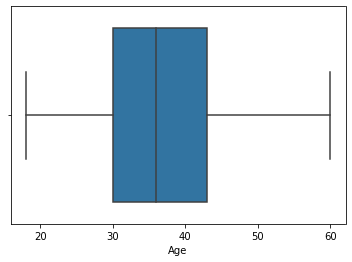

In [46]:
# Find outliers

# 1. Age

sns.boxplot(x = df["Age"])

# no outliers

<AxesSubplot:xlabel='DistanceFromHome'>

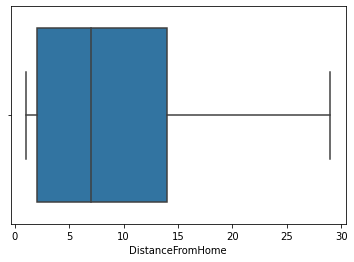

In [47]:
# 2. Distance from Home

sns.boxplot(x = df["DistanceFromHome"])

# no outliers

<AxesSubplot:xlabel='Education'>

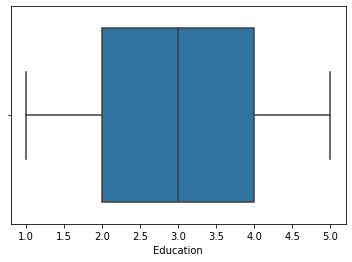

In [48]:
# 3. Education

sns.boxplot(x = df["Education"])

# no outliers

<AxesSubplot:xlabel='MonthlyIncome'>

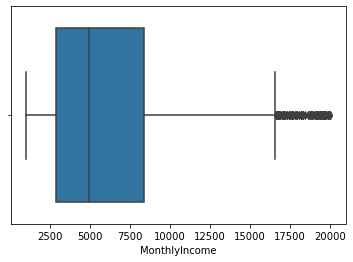

In [50]:
# 4. Monthly Income

sns.boxplot(x = df["MonthlyIncome"])

# many outliers

<AxesSubplot:xlabel='NumCompaniesWorked'>

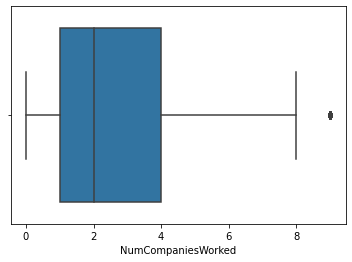

In [55]:
# 5. Number of Companies Worked

sns.boxplot(x = df["NumCompaniesWorked"])

# There are outliers

<AxesSubplot:xlabel='PercentSalaryHike'>

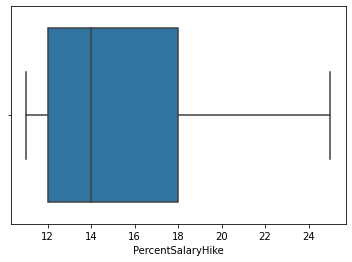

In [59]:
# 6. Percent Salary Hike

sns.boxplot(x = df["PercentSalaryHike"])

# There are no outliers

<AxesSubplot:xlabel='TotalWorkingYears'>

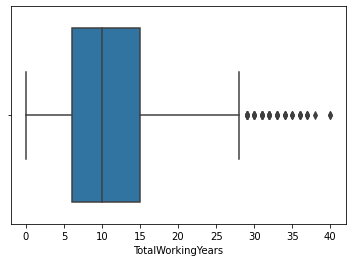

In [60]:
# 7. Total Working Years

sns.boxplot(x = df["TotalWorkingYears"])

# There are many outliers

<AxesSubplot:xlabel='TrainingTimesLastYear'>

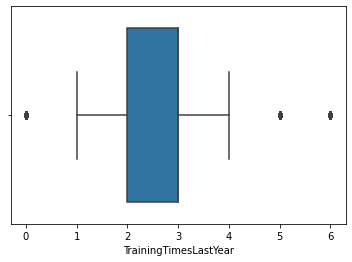

In [63]:
# 8. Training Times Last Year

sns.boxplot(x = df["TrainingTimesLastYear"])

# There are many outliers

<AxesSubplot:xlabel='YearsAtCompany'>

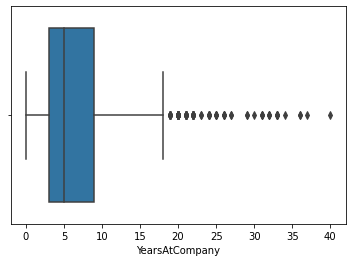

In [66]:
# 9. Years at Company

sns.boxplot(x = df["YearsAtCompany"])

# There are many outliers

<AxesSubplot:xlabel='YearsInCurrentRole'>

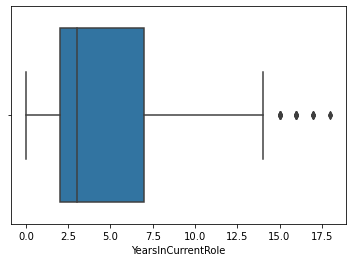

In [69]:
# 9. Years in Current Role

sns.boxplot(x = df["YearsInCurrentRole"])

# There are many outliers

In [73]:
# Make a copy of the dataset before removing outliers
df3 = df.copy()

df3.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,Sales,1,2,Life Sciences,1,2,Female,3,2,Sales Executive,4,Single,5993,8,Y,Yes,11,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,Research & Development,8,1,Life Sciences,2,3,Male,2,2,Research Scientist,2,Married,5130,1,Y,No,23,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,Research & Development,2,2,Other,4,4,Male,2,1,Laboratory Technician,3,Single,2090,6,Y,Yes,15,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,Research & Development,3,4,Life Sciences,5,4,Female,3,1,Research Scientist,3,Married,2909,1,Y,Yes,11,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,Research & Development,2,1,Medical,7,1,Male,3,1,Laboratory Technician,2,Married,3468,9,Y,No,12,3,4,1,6,3,3,2,2,2,2


In [80]:
# Use z-scores to find and remove outliers in monthly income

# To create a new column with z-scores

import scipy.stats as stats

df3["zscoreMnthInc"] = np.abs(stats.zscore(df3["MonthlyIncome"]))

In [81]:
df3.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,zscoreMnthInc
0,41,Yes,Travel_Rarely,Sales,1,2,Life Sciences,1,2,Female,3,2,Sales Executive,4,Single,5993,8,Y,Yes,11,3,1,0,8,0,1,6,4,0,5,0.108350
1,49,No,Travel_Frequently,Research & Development,8,1,Life Sciences,2,3,Male,2,2,Research Scientist,2,Married,5130,1,Y,No,23,4,4,1,10,3,3,10,7,1,7,0.291719
2,37,Yes,Travel_Rarely,Research & Development,2,2,Other,4,4,Male,2,1,Laboratory Technician,3,Single,2090,6,Y,Yes,15,3,2,0,7,3,3,0,0,0,0,0.937654
3,33,No,Travel_Frequently,Research & Development,3,4,Life Sciences,5,4,Female,3,1,Research Scientist,3,Married,2909,1,Y,Yes,11,3,3,0,8,3,3,8,7,3,0,0.763634
4,27,No,Travel_Rarely,Research & Development,2,1,Medical,7,1,Male,3,1,Laboratory Technician,2,Married,3468,9,Y,No,12,3,4,1,6,3,3,2,2,2,2,0.644858


In [86]:
# To find the z-score outliers
df3.loc[df3["zscoreMnthInc"] > 3]

#To drop the outliers
## df3.drop(np.abs(stats.zscore(df3["MonthlyIncome"])) > 3)

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,zscoreMnthInc


In [88]:
cols = df3.columns
len(cols)
for i in range(31):
    if df3.iloc[:, i] == "int64":
        print("integer")
    elif df3.iloc[:, i] == "float64":
        print("float")
    else:
        print ("TRASH")

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [53]:
# Remove income outliers

# determine IQR and outliers of income column

q1 = df2["MonthlyIncome"].quantile(.25)
q3 = df2["MonthlyIncome"].quantile(.75)

iqr = q3 - q1

outlierIncLow = q1 - (1.5*iqr)
outlierIncHigh = q3 + (1.5*iqr)

print("The lower outlier limit for monthly income is: ", outlierIncLow)
print("The upper outlier limit for monthly income is: ", outlierIncHigh)

incOutliers = df2.loc[(df2["MonthlyIncome"] < outlierIncLow) | (df2["MonthlyIncome"] > outlierIncHigh)].index

print(incOutliers)

The lower outlier limit for monthly income is:  -5291.0
The upper outlier limit for monthly income is:  16581.0
Int64Index([  25,   29,   45,   62,  105,  106,  112,  119,  123,  147,
            ...
            1277, 1330, 1331, 1348, 1351, 1374, 1377, 1401, 1437, 1443],
           dtype='int64', length=114)


In [54]:
# drop outliers from income column

df2 = df2.drop(incOutliers)

df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1356 entries, 0 to 1469
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1356 non-null   int64 
 1   Attrition                 1356 non-null   object
 2   BusinessTravel            1356 non-null   object
 3   Department                1356 non-null   object
 4   DistanceFromHome          1356 non-null   int64 
 5   Education                 1356 non-null   int64 
 6   EducationField            1356 non-null   object
 7   EmployeeNumber            1356 non-null   int64 
 8   EnvironmentSatisfaction   1356 non-null   int64 
 9   Gender                    1356 non-null   object
 10  JobInvolvement            1356 non-null   int64 
 11  JobLevel                  1356 non-null   int64 
 12  JobRole                   1356 non-null   object
 13  JobSatisfaction           1356 non-null   int64 
 14  MaritalStatus           

In [56]:
# Remove number of companies worked outliers

# determine IQR and outliers of NumCompaniesWorked column

q1 = df2["NumCompaniesWorked"].quantile(.25)
q3 = df2["NumCompaniesWorked"].quantile(.75)

iqr = q3 - q1

outlierCompWorkLow = q1 - (1.5*iqr)
outlierCompWorkHigh = q3 + (1.5*iqr)

print("The lower outlier limit for number of companies worked is: ", outlierCompWorkLow)
print("The upper outlier limit for number of companies worked is: ", outlierCompWorkHigh)

compWorkOutliers = df2.loc[(df2["NumCompaniesWorked"] < outlierCompWorkLow) | (df2["NumCompaniesWorked"] > outlierCompWorkHigh)].index

print(compWorkOutliers)

The lower outlier limit for number of companies worked is:  -3.5
The upper outlier limit for number of companies worked is:  8.5
Int64Index([   4,   38,   50,   95,  122,  198,  208,  245,  287,  334,  371,
             372,  385,  393,  401,  440,  447,  456,  525,  541,  544,  551,
             575,  597,  617,  623,  660,  717,  756,  779,  789,  816,  837,
             927,  947,  957, 1000, 1035, 1117, 1145, 1162, 1172, 1219, 1262,
            1296, 1357, 1442],
           dtype='int64')


In [57]:
# drop outliers from number of companies worked column

df2 = df2.drop(compWorkOutliers)

df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 1469
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1309 non-null   int64 
 1   Attrition                 1309 non-null   object
 2   BusinessTravel            1309 non-null   object
 3   Department                1309 non-null   object
 4   DistanceFromHome          1309 non-null   int64 
 5   Education                 1309 non-null   int64 
 6   EducationField            1309 non-null   object
 7   EmployeeNumber            1309 non-null   int64 
 8   EnvironmentSatisfaction   1309 non-null   int64 
 9   Gender                    1309 non-null   object
 10  JobInvolvement            1309 non-null   int64 
 11  JobLevel                  1309 non-null   int64 
 12  JobRole                   1309 non-null   object
 13  JobSatisfaction           1309 non-null   int64 
 14  MaritalStatus           

In [61]:
# Remove total working years outliers

# determine IQR and outliers of total working years column

q1 = df2["TotalWorkingYears"].quantile(.25)
q3 = df2["TotalWorkingYears"].quantile(.75)

iqr = q3 - q1

outlierWorkYrsLow = q1 - (1.5*iqr)
outlierWorkYrsHigh = q3 + (1.5*iqr)

print("The lower outlier limit for total working years is: ", outlierWorkYrsLow)
print("The upper outlier limit for total working years is: ", outlierWorkYrsHigh)

workYrsOutliers = df2.loc[(df2["TotalWorkingYears"] < outlierWorkYrsLow) | (df2["TotalWorkingYears"] > outlierWorkYrsHigh)].index

print(workYrsOutliers)

The lower outlier limit for total working years is:  -4.5
The upper outlier limit for total working years is:  23.5
Int64Index([  18,   28,   63,   67,   82,   85,   98,  126,  178,  311,  316,
             375,  390,  406,  408,  424,  465,  534,  552,  616,  624,  627,
             646,  649,  674,  677,  736,  743,  760,  890,  914,  919,  962,
             966,  971,  975,  976,  994, 1010, 1031, 1034, 1054, 1076, 1078,
            1086, 1093, 1111, 1138, 1176, 1181, 1194, 1221, 1223, 1268, 1301,
            1303, 1327, 1414],
           dtype='int64')


In [62]:
# drop outliers from total working years column

df2 = df2.drop(workYrsOutliers)

df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1251 entries, 0 to 1469
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1251 non-null   int64 
 1   Attrition                 1251 non-null   object
 2   BusinessTravel            1251 non-null   object
 3   Department                1251 non-null   object
 4   DistanceFromHome          1251 non-null   int64 
 5   Education                 1251 non-null   int64 
 6   EducationField            1251 non-null   object
 7   EmployeeNumber            1251 non-null   int64 
 8   EnvironmentSatisfaction   1251 non-null   int64 
 9   Gender                    1251 non-null   object
 10  JobInvolvement            1251 non-null   int64 
 11  JobLevel                  1251 non-null   int64 
 12  JobRole                   1251 non-null   object
 13  JobSatisfaction           1251 non-null   int64 
 14  MaritalStatus           

In [64]:
# Remove training times last year outliers

# determine IQR and outliers of training times last year column

q1 = df2["TrainingTimesLastYear"].quantile(.25)
q3 = df2["TrainingTimesLastYear"].quantile(.75)

iqr = q3 - q1

outlierTrainLow = q1 - (1.5*iqr)
outlierTrainHigh = q3 + (1.5*iqr)

print("The lower outlier limit for number of companies worked is: ", outlierTrainLow)
print("The upper outlier limit for number of companies worked is: ", outlierTrainHigh)

trainOutliers = df2.loc[(df2["TrainingTimesLastYear"] < outlierTrainLow) | (df2["TrainingTimesLastYear"] > outlierTrainHigh)].index

print(trainOutliers)

The lower outlier limit for number of companies worked is:  0.5
The upper outlier limit for number of companies worked is:  4.5
Int64Index([   0,   10,   16,   20,   23,   26,   31,   32,   33,   41,
            ...
            1397, 1408, 1412, 1424, 1425, 1436, 1448, 1458, 1466, 1467],
           dtype='int64', length=210)


In [65]:
# drop outliers from training times last year column

df2 = df2.drop(trainOutliers)

df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1041 entries, 1 to 1469
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1041 non-null   int64 
 1   Attrition                 1041 non-null   object
 2   BusinessTravel            1041 non-null   object
 3   Department                1041 non-null   object
 4   DistanceFromHome          1041 non-null   int64 
 5   Education                 1041 non-null   int64 
 6   EducationField            1041 non-null   object
 7   EmployeeNumber            1041 non-null   int64 
 8   EnvironmentSatisfaction   1041 non-null   int64 
 9   Gender                    1041 non-null   object
 10  JobInvolvement            1041 non-null   int64 
 11  JobLevel                  1041 non-null   int64 
 12  JobRole                   1041 non-null   object
 13  JobSatisfaction           1041 non-null   int64 
 14  MaritalStatus           

In [67]:
# Remove years at company outliers

# determine IQR and outliers of years at company column

q1 = df2["YearsAtCompany"].quantile(.25)
q3 = df2["YearsAtCompany"].quantile(.75)

iqr = q3 - q1

outlierYrsCompLow = q1 - (1.5*iqr)
outlierYrsCompHigh = q3 + (1.5*iqr)

print("The lower outlier limit for monthly income is: ", outlierYrsCompLow)
print("The upper outlier limit for monthly income is: ", outlierYrsCompHigh)

yrsCompOutliers = df2.loc[(df2["YearsAtCompany"] < outlierYrsCompLow) | (df2["YearsAtCompany"] > outlierYrsCompHigh)].index

print(yrsCompOutliers)

The lower outlier limit for monthly income is:  -6.0
The upper outlier limit for monthly income is:  18.0
Int64Index([  90,  150,  218,  251,  268,  281,  295,  300,  448,  523,  526,
             707,  738,  753,  784,  838,  875,  926,  951,  995, 1096, 1295,
            1373, 1403, 1404, 1445, 1462],
           dtype='int64')


In [68]:
# drop outliers from years at company column

df2 = df2.drop(yrsCompOutliers)

df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1014 entries, 1 to 1469
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1014 non-null   int64 
 1   Attrition                 1014 non-null   object
 2   BusinessTravel            1014 non-null   object
 3   Department                1014 non-null   object
 4   DistanceFromHome          1014 non-null   int64 
 5   Education                 1014 non-null   int64 
 6   EducationField            1014 non-null   object
 7   EmployeeNumber            1014 non-null   int64 
 8   EnvironmentSatisfaction   1014 non-null   int64 
 9   Gender                    1014 non-null   object
 10  JobInvolvement            1014 non-null   int64 
 11  JobLevel                  1014 non-null   int64 
 12  JobRole                   1014 non-null   object
 13  JobSatisfaction           1014 non-null   int64 
 14  MaritalStatus           

In [72]:
# Remove years in current role outliers

# determine IQR and outliers of years in current role column

q1 = df2["YearsInCurrentRole"].quantile(.25)
q3 = df2["YearsInCurrentRole"].quantile(.75)

iqr = q3 - q1

outlierYrsRoleLow = q1 - (1.5*iqr)
outlierYrsRoleHigh = q3 + (1.5*iqr)

print("The lower outlier limit for years in current role is: ", outlierYrsRoleLow)
print("The upper outlier limit for years in current role is: ", outlierYrsRoleHigh)

yrsRoleOutliers = df2.loc[(df2["YearsInCurrentRole"] < outlierYrsRoleLow) | (df2["YearsInCurrentRole"] > outlierYrsRoleHigh)].index

print(yrsRoleOutliers)

The lower outlier limit for years in current role is:  nan
The upper outlier limit for years in current role is:  nan
Int64Index([], dtype='int64')


In [71]:
# drop outliers from years at company column

df2 = df2.drop(yrsRoleOutliers)

df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       0 non-null      int64 
 1   Attrition                 0 non-null      object
 2   BusinessTravel            0 non-null      object
 3   Department                0 non-null      object
 4   DistanceFromHome          0 non-null      int64 
 5   Education                 0 non-null      int64 
 6   EducationField            0 non-null      object
 7   EmployeeNumber            0 non-null      int64 
 8   EnvironmentSatisfaction   0 non-null      int64 
 9   Gender                    0 non-null      object
 10  JobInvolvement            0 non-null      int64 
 11  JobLevel                  0 non-null      int64 
 12  JobRole                   0 non-null      object
 13  JobSatisfaction           0 non-null      int64 
 14  MaritalStatus             0 non-null  

In [52]:
# Find meaningful relationships regarding employee turnover

# 1. AGE vs. Attrition
df["Age"].groupby(df["Attrition"]).mean()

## Younger employees leaving

Attrition
No     37.561233
Yes    33.607595
Name: Age, dtype: float64

In [17]:
# 2. DISTANCE from Home vs. Attrition
df["DistanceFromHome"].groupby(df["Attrition"]).mean()

## Employees who live farther leaving

Attrition
No      8.915653
Yes    10.632911
Name: DistanceFromHome, dtype: float64

In [18]:
# 3. Education Level vs. Attrition
df["Education"].groupby(df["Attrition"]).mean()

## Insignificant difference

Attrition
No     2.927007
Yes    2.839662
Name: Education, dtype: float64

In [19]:
# 4. ENVIRONMENT Satisfaction vs. Attrition
df["EnvironmentSatisfaction"].groupby(df["Attrition"]).mean()

## Lower satisfaction leaving

Attrition
No     2.771290
Yes    2.464135
Name: EnvironmentSatisfaction, dtype: float64

In [20]:
# 5. JOB INVOLVEMENT vs. Attrition
df["JobInvolvement"].groupby(df["Attrition"]).mean()

## Lower job involvement leaving

Attrition
No     2.770479
Yes    2.518987
Name: JobInvolvement, dtype: float64

In [21]:
# 6. JOB LEVEL vs. Attrition
df["JobLevel"].groupby(df["Attrition"]).mean()

## Lower job level leaving

Attrition
No     2.145985
Yes    1.637131
Name: JobLevel, dtype: float64

In [22]:
# 7. JOB SATISFACTION vs. Attrition
df["JobSatisfaction"].groupby(df["Attrition"]).mean()

## Lower job satisfaction leaving

Attrition
No     2.778589
Yes    2.468354
Name: JobSatisfaction, dtype: float64

In [23]:
# 8. MONTHLY INCOME vs. Attrition
df["MonthlyIncome"].groupby(df["Attrition"]).mean()

## Lower income leaving

Attrition
No     6832.739659
Yes    4787.092827
Name: MonthlyIncome, dtype: float64

In [29]:
# 8. MONTHLY INCOME vs. Attrition
df["MonthlyIncome"].groupby(df["Attrition"]).median()

## Lower income leaving

Attrition
No     5204.0
Yes    3202.0
Name: MonthlyIncome, dtype: float64

In [24]:
# 9. Number Companies Worked vs. Attrition
df["NumCompaniesWorked"].groupby(df["Attrition"]).mean()

## Insignificant difference

Attrition
No     2.645580
Yes    2.940928
Name: NumCompaniesWorked, dtype: float64

In [25]:
# 10. Percent Salary Hike vs. Attrition
df["PercentSalaryHike"].groupby(df["Attrition"]).mean()

## Insignificant difference

Attrition
No     15.231144
Yes    15.097046
Name: PercentSalaryHike, dtype: float64

In [26]:
# 11. Performance Rating vs. Attrition
df["PerformanceRating"].groupby(df["Attrition"]).mean()

## Insignificant difference

Attrition
No     3.153285
Yes    3.156118
Name: PerformanceRating, dtype: float64

In [27]:
# 12. RELATIONSHIP SATISFACTION vs. Attrition
df["RelationshipSatisfaction"].groupby(df["Attrition"]).mean()

## Lower relationship satisfaction leaving

Attrition
No     2.733982
Yes    2.599156
Name: RelationshipSatisfaction, dtype: float64

In [28]:
# 13. Stock Option Level vs. Attrition
df["StockOptionLevel"].groupby(df["Attrition"]).mean()

## Lower stock option level leaving

Attrition
No     0.845093
Yes    0.527426
Name: StockOptionLevel, dtype: float64

In [30]:
# 14. Total Working Years vs. Attrition
df["TotalWorkingYears"].groupby(df["Attrition"]).mean()

## Younger people leaving (coincides with #1)

Attrition
No     11.862936
Yes     8.244726
Name: TotalWorkingYears, dtype: float64

In [31]:
# 15. Trainings vs. Attrition
df["TrainingTimesLastYear"].groupby(df["Attrition"]).mean()

## Insignificant difference

Attrition
No     2.832928
Yes    2.624473
Name: TrainingTimesLastYear, dtype: float64

In [32]:
# 16. Work-Life Balance vs. Attrition
df["WorkLifeBalance"].groupby(df["Attrition"]).mean()

## Insignificant difference

Attrition
No     2.781022
Yes    2.658228
Name: WorkLifeBalance, dtype: float64

In [33]:
# 17. YEARS AT COMPANY vs. Attrition
df["YearsAtCompany"].groupby(df["Attrition"]).mean()

## Fewer years at company leaving

Attrition
No     7.369019
Yes    5.130802
Name: YearsAtCompany, dtype: float64

In [34]:
# 18. YEARS IN CURRENT ROLE vs. Attrition
df["YearsInCurrentRole"].groupby(df["Attrition"]).mean()

## Fewer years in current role leaving

Attrition
No     4.484185
Yes    2.902954
Name: YearsInCurrentRole, dtype: float64

In [35]:
# 19. Years Since Last Promotion vs. Attrition
df["YearsSinceLastPromotion"].groupby(df["Attrition"]).mean()

## Fewer years since last promotion leaving (moderate difference)

Attrition
No     2.234388
Yes    1.945148
Name: YearsSinceLastPromotion, dtype: float64

In [37]:
# 20. YEARS WITH CURRENT MANAGER vs. Attrition
df["YearsWithCurrManager"].groupby(df["Attrition"]).mean()

## Fewer years with current manager leaving

Attrition
No     4.367397
Yes    2.852321
Name: YearsWithCurrManager, dtype: float64

In [41]:
# 21. Business Travel vs. Attrition
pd.crosstab(df["BusinessTravel"], df["Attrition"], margins = True)

## No significant relationship

Attrition,No,Yes,All
BusinessTravel,,,
Non-Travel,138,12,150
Travel_Frequently,208,69,277
Travel_Rarely,887,156,1043
All,1233,237,1470


In [44]:
# 22. Department vs. Attrition
pd.crosstab(df["Department"], df["Attrition"], margins = True)

## No significant relationship

Attrition,No,Yes,All
Department,,,
Human Resources,51,12,63
Research & Development,828,133,961
Sales,354,92,446
All,1233,237,1470


In [45]:
# 23. Education Field vs. Attrition
pd.crosstab(df["EducationField"], df["Attrition"], margins = True)

## No significant relationship

Attrition,No,Yes,All
EducationField,,,
Human Resources,20,7,27
Life Sciences,517,89,606
Marketing,124,35,159
Medical,401,63,464
Other,71,11,82
Technical Degree,100,32,132
All,1233,237,1470


In [ ]:
# 24. Education Field vs. Attrition
pd.crosstab(df["EducationField"], df["Attrition"], margins = True)

## No significant relationship